In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import math
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from matplotlib.font_manager import FontProperties

In [20]:
#資料欄位刪減
df = pd.read_csv('hour.csv',na_values = '?')
#df=df.drop(["ID"],axis=1)
df = df.drop(columns=['instant','dteday','casual','registered'])
df
df1=df['cnt']

In [21]:
#MinMax處理
scaler = MinMaxScaler()
df = df.drop(columns=['cnt'])
scaler.fit(df)
scaled_features = scaler.transform(df)
df_MinMax = pd.DataFrame(data=scaled_features, columns=['season','yr','mnth','hr','hoilday','weekday','workingday','weathersit',
                                                        'temp','atemp','hum','windspeed'])
                                                        
print(df_MinMax)

       season   yr  mnth        hr  hoilday   weekday  workingday  weathersit  \
0         0.0  0.0   0.0  0.000000      0.0  1.000000         0.0    0.000000   
1         0.0  0.0   0.0  0.043478      0.0  1.000000         0.0    0.000000   
2         0.0  0.0   0.0  0.086957      0.0  1.000000         0.0    0.000000   
3         0.0  0.0   0.0  0.130435      0.0  1.000000         0.0    0.000000   
4         0.0  0.0   0.0  0.173913      0.0  1.000000         0.0    0.000000   
...       ...  ...   ...       ...      ...       ...         ...         ...   
17374     0.0  1.0   1.0  0.826087      0.0  0.166667         1.0    0.333333   
17375     0.0  1.0   1.0  0.869565      0.0  0.166667         1.0    0.333333   
17376     0.0  1.0   1.0  0.913043      0.0  0.166667         1.0    0.000000   
17377     0.0  1.0   1.0  0.956522      0.0  0.166667         1.0    0.000000   
17378     0.0  1.0   1.0  1.000000      0.0  0.166667         1.0    0.000000   

           temp   atemp   h

In [22]:
df2 = pd.read_csv('hour.csv',   #時間與租借數量的關係
         usecols=['hr', 'cnt'])
pvt = df2.pivot_table(values='cnt', index='hr')
pvt

,cnt
hr,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


In [23]:
x=df_MinMax
y=df1
#df.hr.describe()


In [24]:
#訓練測試資料分割
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(12165, 12) (12165,) (5214, 12) (5214,)


In [25]:
#隨機森林
rf=RandomForestRegressor(n_estimators=150,random_state=1)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(rf)
print('MAE為:%.3f'%(mean_absolute_error(y_test,y_pred)))
print('RMSE為:%.3f'%(np.sqrt(mean_squared_error(y_test,y_pred))))
print('MAPE為:{: .3f}'.format(mean_absolute_percentage_error(y_test,y_pred)))
rf.score(x_test,y_test)

RandomForestRegressor(n_estimators=150, random_state=1)
MAE為:25.693
RMSE為:44.087
MAPE為: 0.303


0.9394267159049906

<AxesSubplot:>

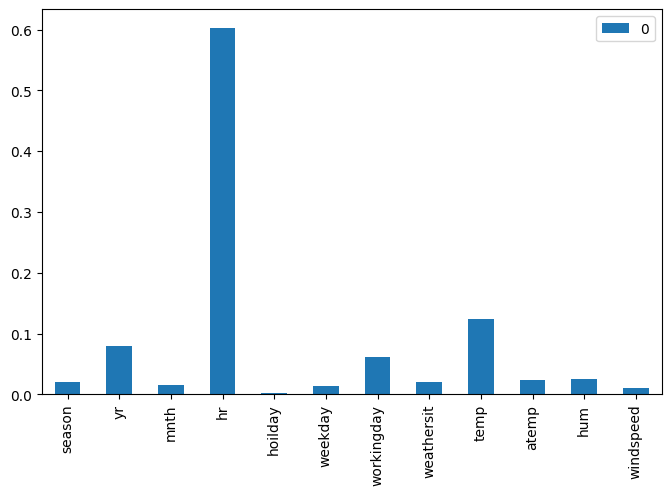

In [26]:
#隨機森林importance
feature_df = x
feature_names = feature_df.columns
feature_importance = pd.DataFrame(rf.feature_importances_,index = feature_names)
feature_importance.plot(kind='bar')


In [27]:
#隨機森林特徵刪減
x_tr_d = x_train.drop(columns=['season','mnth','hoilday','hoilday','weekday','weathersit','atemp','hum','windspeed'])
X_train = x_tr_d.values
x_te_d = x_test.drop(columns=['season','mnth','hoilday','hoilday','weekday','weathersit','atemp','hum','windspeed'])
X_test = x_te_d.values
Y_train = y_train.values
Y_test = y_test.values
print(x_te_d)
#print(Y_test)

        yr        hr  workingday      temp
12692  1.0  0.043478         1.0  0.530612
11140  1.0  0.391304         0.0  0.408163
6310   0.0  0.521739         0.0  0.653061
12694  1.0  0.130435         1.0  0.510204
214    0.0  0.217391         1.0  0.081633
...    ...       ...         ...       ...
1531   0.0  0.173913         1.0  0.224490
6603   0.0  0.739130         1.0  0.591837
4236   0.0  0.434783         1.0  0.714286
10103  1.0  0.043478         1.0  0.326531
1117   0.0  0.304348         0.0  0.367347

[5214 rows x 4 columns]


In [28]:
#隨機森林特徵刪減後
rf=RandomForestRegressor(n_estimators=100,random_state=1)
rf.fit(X_train,Y_train)

y_pred = rf.predict(X_test)
print('MAE為:%.3f'%(mean_absolute_error(Y_test,y_pred)))
print('RMSE為:%.3f'%(np.sqrt(mean_squared_error(Y_test,y_pred))))
print('MAPE為:{: .3f}'.format(mean_absolute_percentage_error(y_test,y_pred)))
rf.score(X_test,Y_test)

MAE為:42.594
RMSE為:70.373
MAPE為: 0.466


0.8456592884373627

In [29]:
#KNN計算最佳n_neighbor值
n=1
k_value_range = range(1,30)
k_value_scores = []
for k in k_value_range:
    n=n+1
    kng = KNeighborsRegressor(n_neighbors=n)
    kng.fit(x_train,y_train)
    y_pred = kng.predict(x_test)
    score=kng.score(x_test,y_test)
    print('n_neighbor值為',n,'的時候score為:%.3f'%(score))   
    k_value_scores.append(score)

n_neighbor值為 2 的時候score為:0.683
n_neighbor值為 3 的時候score為:0.689
n_neighbor值為 4 的時候score為:0.692
n_neighbor值為 5 的時候score為:0.692
n_neighbor值為 6 的時候score為:0.696
n_neighbor值為 7 的時候score為:0.694
n_neighbor值為 8 的時候score為:0.693
n_neighbor值為 9 的時候score為:0.692
n_neighbor值為 10 的時候score為:0.687
n_neighbor值為 11 的時候score為:0.684
n_neighbor值為 12 的時候score為:0.682
n_neighbor值為 13 的時候score為:0.678
n_neighbor值為 14 的時候score為:0.676
n_neighbor值為 15 的時候score為:0.673
n_neighbor值為 16 的時候score為:0.671
n_neighbor值為 17 的時候score為:0.667
n_neighbor值為 18 的時候score為:0.663
n_neighbor值為 19 的時候score為:0.660
n_neighbor值為 20 的時候score為:0.658
n_neighbor值為 21 的時候score為:0.654
n_neighbor值為 22 的時候score為:0.651
n_neighbor值為 23 的時候score為:0.649
n_neighbor值為 24 的時候score為:0.647
n_neighbor值為 25 的時候score為:0.645
n_neighbor值為 26 的時候score為:0.641
n_neighbor值為 27 的時候score為:0.638
n_neighbor值為 28 的時候score為:0.636
n_neighbor值為 29 的時候score為:0.633
n_neighbor值為 30 的時候score為:0.631


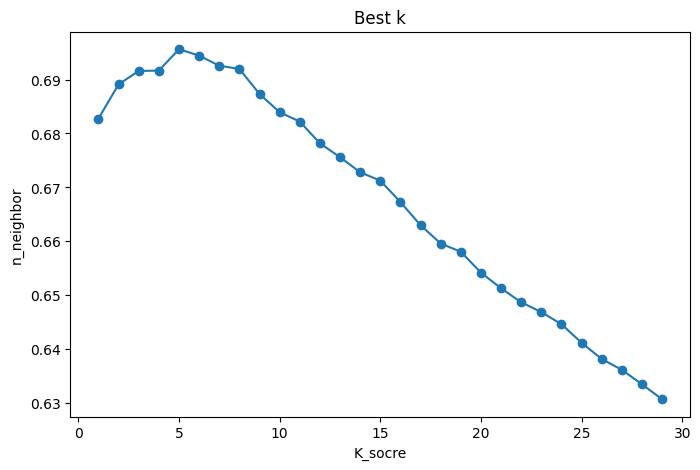

In [30]:
#最佳k值
plt.plot(k_value_range,k_value_scores, marker = 'o')
plt.title("Best k")
plt.xlabel("K_socre")
plt.ylabel("n_neighbor")
plt.show()

In [31]:
#KNN n_neighbor=5時的結果
kng = KNeighborsRegressor(n_neighbors=5)
kng.fit(x_train,y_train)
y_pred = kng.predict(x_test)
score=kng.score(x_test,y_test)
MAPE = metrics.mean_absolute_percentage_error(y_test,y_pred) * 100
print('MAE為:%.3f'%(mean_absolute_error(y_test,y_pred)))
print('RMSE為:%.3f'%(np.sqrt(mean_squared_error(y_test,y_pred))))
print('MAPE為:{: .3f}'.format(mean_absolute_percentage_error(y_test,y_pred)))
print(score)

MAE為:65.515
RMSE為:99.467
MAPE為: 1.414
0.6916658931784985


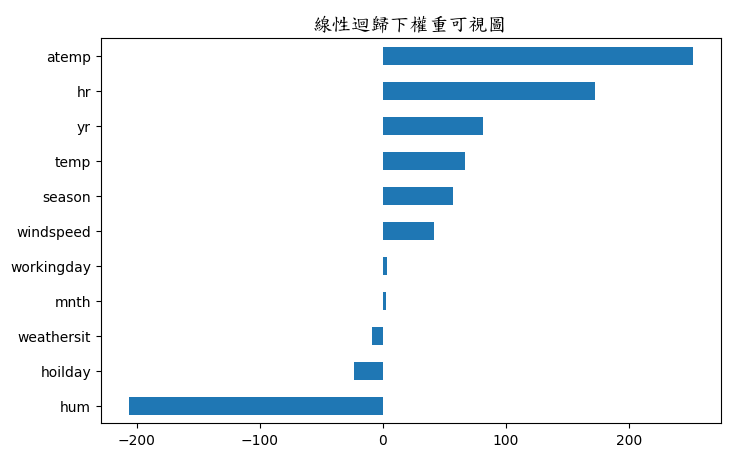

In [32]:
#線性回歸特徵權重計算
features = ['season','yr','mnth','hr','hoilday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']
reg=LassoCV()
reg.fit(x_train,y_train)
coef=pd.Series(reg.coef_,index=features)
chinese = FontProperties(fname='C:\Windows\Fonts\kaiu.ttf')
imp_coef = pd.concat([coef.sort_values().head(5), coef.sort_values().tail(6)])
plt.rcParams['figure.figsize'] = (8,5)
imp_coef.plot(kind = "barh")
plt.title("線性迴歸下權重可視圖", fontproperties=chinese, size=14)
plt.show()

In [33]:
#KNN特徵刪減
x_tr_d = x_train.drop(columns=['hum','hoilday','weathersit','mnth','workingday','windspeed','season'])
X_train = x_tr_d.values
x_te_d = x_test.drop(columns=['hum','hoilday','weathersit','mnth','workingday','windspeed','season'])
X_test = x_te_d.values
Y_train = y_train.values
Y_test = y_test.values
#print(x_te_d)
#print(Y_test)

In [34]:
#KNN特徵刪減後
kng = KNeighborsRegressor(n_neighbors=5)
kng.fit(X_train,Y_train)
y_pred = kng.predict(X_test)
score=kng.score(X_test,Y_test)
print('MAE為:%.3f'%(mean_absolute_error(Y_test,y_pred)))
print('RMSE為:%.3f'%(np.sqrt(mean_squared_error(Y_test,y_pred))))
print('MAPE為:{: .3f}'.format(mean_absolute_percentage_error(y_test,y_pred)))
print(score)

MAE為:44.363
RMSE為:72.346
MAPE為: 0.503
0.8368841194654022


In [35]:
#XGBOOST
import xgboost as xgb
xg=xgb.XGBRegressor(n_estimators=100)
xg.fit(x_train,y_train)
y_pred = xg.predict(x_test)
print('MAE為:%.3f'%(mean_absolute_error(y_test,y_pred)))
print('RMSE為:%.3f'%(np.sqrt(mean_squared_error(y_test,y_pred))))
print('MAPE為:{: .3f}'.format(mean_absolute_percentage_error(y_test,y_pred)))
xg.score(x_test,y_test)

MAE為:25.811
RMSE為:41.371
MAPE為: 0.411


0.9466588152135879

<AxesSubplot:>

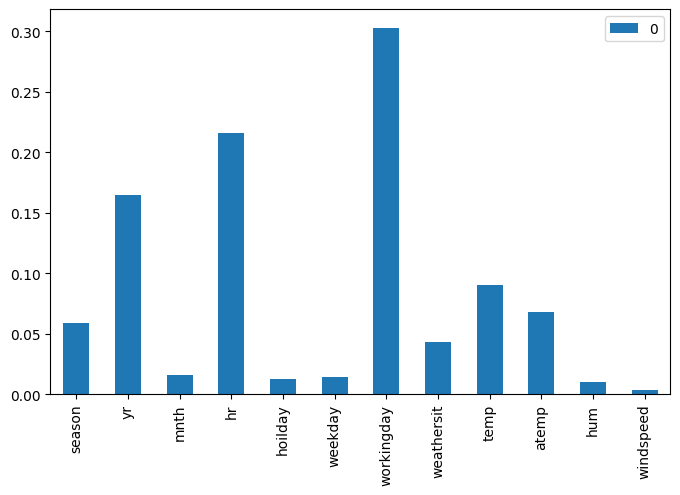

In [36]:
#XGBOOST特徵importance
feature_importance = pd.DataFrame(xg.feature_importances_,index = feature_names)
feature_importance.plot(kind='bar')

In [37]:
#XGBOOST特徵刪減
x_tr_d = x_train.drop(columns=['mnth','hoilday','weekday','hum','windspeed'])
X_train = x_tr_d.values
x_te_d = x_test.drop(columns=['mnth','hoilday','weekday','hum','windspeed'])
X_test = x_te_d.values
Y_train = y_train.values
Y_test = y_test.values
#print(x_te_d)
#print(Y_test)

In [38]:
#XGBOOST特徵刪減後
import xgboost as xgb
xg=xgb.XGBRegressor(n_estimators=150)
xg.fit(X_train,Y_train)
y_pred = xg.predict(X_test)
print('MAE為:%.3f'%(mean_absolute_error(Y_test,y_pred)))
print('RMSE為:%.3f'%(np.sqrt(mean_squared_error(Y_test,y_pred))))
print('MAPE為:{: .3f}'.format(mean_absolute_percentage_error(y_test,y_pred)))
xg.score(X_test,Y_test)

MAE為:30.441
RMSE為:50.216
MAPE為: 0.382


0.9214129019123488